In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm
import pyvo
import os
import sys

sys.path.append('../')
sys.path.append('../../')
import WD_models
#import interpolator as interp

from stark import utils, plotting

Text(0, 0.5, 'N')

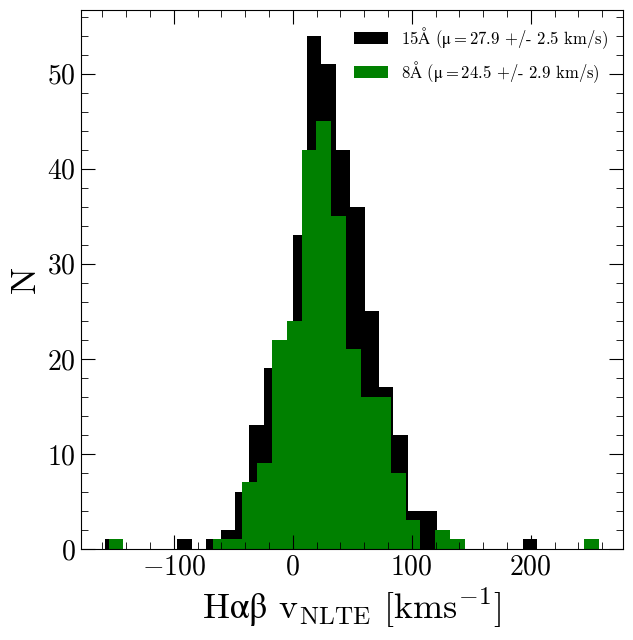

In [142]:
"""mean gravz for the Hab fits
"""
ab15 = utils.read_clean_nlte(coresize=15, lines='ab')
ab8 = utils.read_clean_nlte(coresize=8, lines='ab')

plt.hist(ab15.nlte_rv, label = f'$15\\AA$ ($\\mu = ${ab15.nlte_rv.median():2.1f} +/- {1.2533*ab15.nlte_rv.std()/np.sqrt(len(ab15)):2.1f} km/s)', color='k');
plt.hist(ab8.nlte_rv, label = f'$8\\AA$ ($\\mu = ${ab8.nlte_rv.median():2.1f} +/- {1.2533*ab8.nlte_rv.std()/np.sqrt(len(ab8)):2.1f} km/s)', color='green');
#plt.axvline(x = 32.57, label='Falcon+2010', c='blue', lw=3)
plt.legend(framealpha=0, fontsize=12)
plt.xlabel('H$\\alpha\\beta$ $v_\\text{NLTE}$ $[kms^{-1}]$')
plt.ylabel('N')

Text(0, 0.5, 'N')

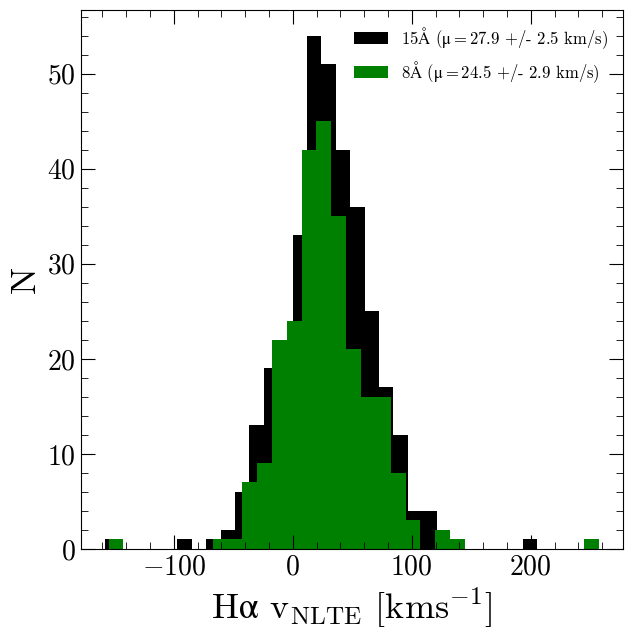

In [143]:
"""mean gravz for the Hab fits
"""
a15 = utils.read_clean_nlte(coresize=15, lines='ab')
a8 = utils.read_clean_nlte(coresize=8, lines='ab')

plt.hist(a15.nlte_rv, label = f'$15\\AA$ ($\\mu = ${a15.nlte_rv.median():2.1f} +/- {1.2533*a15.nlte_rv.std()/np.sqrt(len(a15)):2.1f} km/s)', color='k');
plt.hist(a8.nlte_rv, label = f'$8\\AA$ ($\\mu = ${a8.nlte_rv.median():2.1f} +/- {1.2533*a8.nlte_rv.std()/np.sqrt(len(a8)):2.1f} km/s)', color='green');
#plt.axvline(x = 32.57, label='Falcon+2010', c='blue', lw=3)
plt.legend(framealpha=0, fontsize=12)
plt.xlabel('H$\\alpha$ $v_\\text{NLTE}$ $[kms^{-1}]$')
plt.ylabel('N')

In [144]:
import astropy
import astropy.units as u

goodcoadds = pd.read_csv(utils.fetch_goodspypath())[['Name', 'SOURCE_ID']]
tap_service = pyvo.dal.TAPService("http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap/")
QUERY = f"""select *
        from \"J/ApJ/712/585/WDs\"
        """
table = tap_service.search(QUERY).to_table().to_pandas()
table['Name'] = table['Name'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
table = pd.merge(pd.merge(table, goodcoadds, on="Name"), ab8, left_on="SOURCE_ID", right_on="source_id")

Text(0, 0.5, 'NLTE H$\\alpha\\beta$ $15\\AA$ $[kms^{-1}]$')

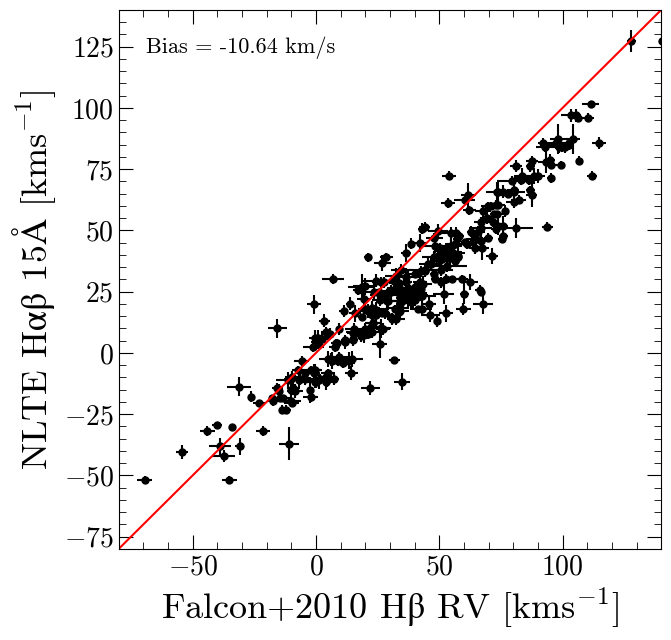

In [145]:
plt.errorbar(table['Hb-V'] - table['LSR-V'], table['nlte_rv'], xerr=table['e_Hb-V'], yerr=table['nlte_e_rv'], fmt='o', c = 'k', zorder=0)
xmin,xmax = -80, 140
plt.plot([xmin, xmax], [xmin,xmax],c='red')
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)

plt.text(0.05, 0.95, f'Bias = {np.mean(table['nlte_rv'] - (table['Hb-V'] - table['LSR-V'])):2.2f} km/s', transform=plt.gca().transAxes,
                fontsize=16, verticalalignment='top')
plt.xlabel('Falcon+2010 H$\\beta$ RV $[kms^{-1}]$')
plt.ylabel('NLTE H$\\alpha\\beta$ $15\\AA$ $[kms^{-1}]$')

In [146]:
table.head()

,recno,Name,DA,Adp-V,e_Adp-V,Obs,LSR-V,Ha-V,e_Ha-V,Hb-V,...,e_Obs-V,_RA,_DE,SOURCE_ID,source_id,nlte_rv,nlte_e_rv,nlte_teff,nlte_logg,nlte_redchi
0,158,WD0302+027,n,22.281,1.969,17057130,15.364,22.281,1.969,NaN,...,1.969,46.15583,2.94906,1068931460633216,1068931460633216,-2.776534,6.837850,39003.754669,7.190770,1.666636
1,162,WD0307+149,n,-2.777,0.008,85654347,14.713,-2.774,1.199,-2.789,...,0.008,47.47479,15.08947,31047257726638592,31047257726638592,-19.591972,1.914773,13263.380018,7.605397,3.938758
2,222,HS0400+1451,n,77.929,0.467,85905718,14.687,78.039,0.842,76.932,...,0.467,60.92533,14.99136,39305036729495936,39305036729495936,58.235786,1.926102,13362.739733,8.216062,3.770880
3,171,WD0308+188,n,31.094,1.458,85901615,15.578,31.535,0.874,32.476,...,0.522,47.95508,19.01542,59077760488621184,59077760488621184,25.658802,1.899900,13609.026689,8.410437,2.810560
4,172,WD0308+188,n,31.094,1.458,96082733,-35.621,29.099,0.769,30.730,...,0.868,47.95508,19.01542,59077760488621184,59077760488621184,25.658802,1.899900,13609.026689,8.410437,2.810560
